In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import numpy as np
import datetime
import os, sys, re
try:
  import cartopy.crs as ccrs
except:
  !pip install cartopy
  import cartopy.crs as ccrs
import cartopy.feature as cf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PR, Visualizacion de datos/Datos/terremotos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    16719 non-null  int64  
 1   Id          0 non-null      float64
 2   Date        0 non-null      float64
 3   Time        0 non-null      float64
 4   DateTime    16719 non-null  object 
 5   ErrTime     16719 non-null  float64
 6   RMS         16719 non-null  float64
 7   Latitude    16719 non-null  float64
 8   Longitude   16719 non-null  float64
 9   Smaj        16719 non-null  float64
 10  Smin        16719 non-null  float64
 11  Az          16719 non-null  int64  
 12  Depth       16719 non-null  float64
 13  ErrDepth    16719 non-null  float64
 14  Ndef        16719 non-null  int64  
 15  Nsta        16719 non-null  int64  
 16  Gap         16719 non-null  int64  
 17  mdist       16719 non-null  float64
 18  Mdist_      16719 non-null  float64
 19  Qual        16719 non-nul

In [ ]:
df

,OBJECTID,Id,Date,Time,DateTime,ErrTime,RMS,Latitude,Longitude,Smaj,...,Qual,Author,OrigID,Magnitud,IntensMax,Localizaci,TipoMagnit,XUTM,YUTM,GlobalID
0,17,NaN,NaN,NaN,2017/10/07 10:27:29.820+00,2.18,0.19,28.5661,-17.8807,16.6,...,m i ke,IGN,es2017mbfgp,1.6,NaN,NaN,mbLg,218191,3163304,b497df2a-1f01-4c8f-aaac-a407cd5ffb06
1,18,NaN,NaN,NaN,2017/10/07 13:03:25.460+00,2.19,0.20,28.5584,-17.8508,46.7,...,m i ke,IGN,es2017mbgkc,2.7,NaN,NaN,mbLg,221097,3162380,9dc03122-2051-40f2-9b4e-95a0e647b224
2,19,NaN,NaN,NaN,2017/10/07 20:09:58.790+00,2.33,0.16,28.5719,-17.8735,18.9,...,m i ke,IGN,es2017mbjoj,1.7,NaN,NaN,mbLg,218912,3163930,764d0ea4-cabd-480e-b6c5-f4fa2b6636d9
3,20,NaN,NaN,NaN,2017/10/07 23:06:00+00,2.44,0.11,28.5656,-17.8802,18.3,...,m i ke,IGN,es2017mblee,1.7,NaN,NaN,mbLg,218239,3163248,34be9c1e-ad73-4448-a384-a4f66448db81
4,21,NaN,NaN,NaN,2017/10/08 01:23:02.150+00,1.93,0.17,28.5499,-17.8549,19.7,...,m i ke,IGN,es2017mbmfb,2.6,NaN,NaN,mbLg,220674,3161448,efedb131-11be-473a-b92f-85a15ffdb823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,16732,NaN,NaN,NaN,2022/11/28 07:43:40.320+00,1.93,0.10,28.6084,-17.8826,13.5,...,m i ke,IGN,es2022xhmev,1.3,NaN,S EL PASO.ILP,mbLg,218118,3167998,a1b0751a-ae93-4209-9dee-c9dfbafe57bc
16715,16733,NaN,NaN,NaN,2022/11/29 21:02:30.530+00,1.97,0.17,28.6248,-17.8631,17.1,...,m i ke,IGN,es2022xkibm,1.5,NaN,SE EL PASO.ILP,mbLg,220070,3169770,7d58de56-e4ce-4fc0-b6f8-9c40d34729a8
16716,16734,NaN,NaN,NaN,2022/12/02 02:20:15.160+00,0.55,0.40,28.6213,-17.8763,3.7,...,m i ke,IGN,es2022xojot,1.4,NaN,S EL PASO.ILP,mbLg,218769,3169413,7554ee5b-ced8-4701-8030-357b458cab4a
16717,16735,NaN,NaN,NaN,2022/12/02 04:08:59.920+00,0.64,0.29,28.6282,-17.8701,4.4,...,m i km,IGN,es2022xoneb,0.8,NaN,SE EL PASO.ILP,mbLg,219394,3170164,437bdf1c-5de8-4adc-b5ee-80b64895c2de


In [ ]:
df.DateTime = pd.to_datetime(df.DateTime, format='ISO8601')
df['Year'] = df.DateTime.dt.year
df.Date = df.DateTime.dt.date
df.Time = df.DateTime.dt.time
df.head()
cjd = df[['Year',
          'Date',
          'Latitude',
          'Longitude',
          'Depth',
          'ErrDepth',
          'Magnitud']]

cjd['Tipo'] = np.where(cjd.Magnitud < 3,
                       f"Imperceptible, < 3.5",
                       f"Percetible, > 3.5")

<ipython-input-5-c655da7e80f1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cjd['Tipo'] = np.where(cjd.Magnitud < 3,


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


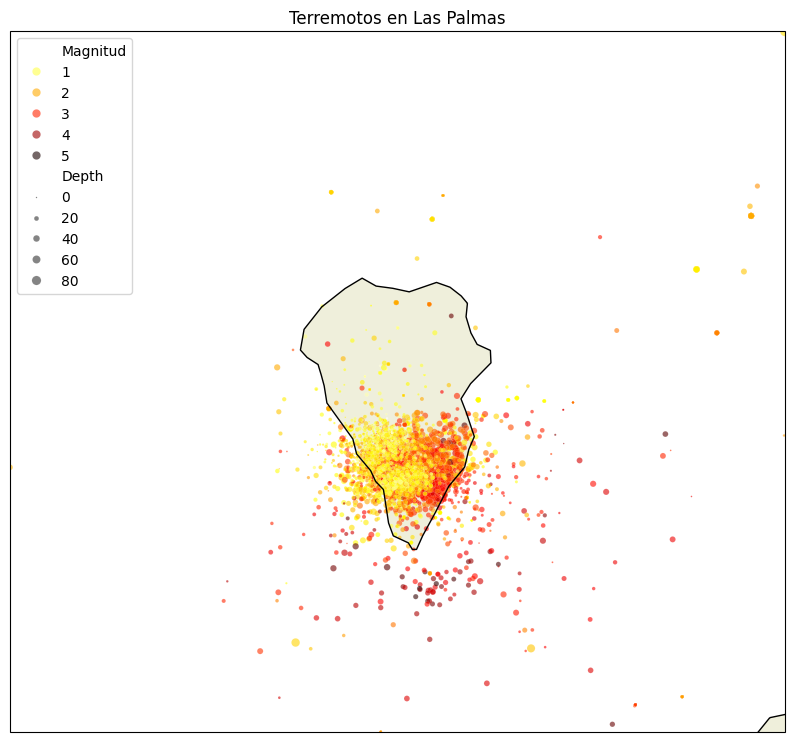

In [ ]:
import cartopy.feature as cf

norma_color = Normalize(vmin=cjd.Magnitud.min(), vmax=cjd.Magnitud.max())
norma_tamanno = Normalize(vmin=cjd.Depth.min(), vmax=cjd.Depth.max())

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.scatter(lon, lat, , s=1, zorder=3, label='scatter')
sns.scatterplot(x='Longitude', y='Latitude', data=cjd, hue='Magnitud', palette='hot_r', alpha=0.6, transform=ccrs.PlateCarree(),
                size='Depth', hue_norm=norma_color, size_norm=norma_tamanno, sizes=(1, 50), ax=ax)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.LAND)
#ax.set_extent([df.Longitude.min(), df.Longitude.max()+5, df.Latitude.min()-1, df.Latitude.max()+1])
ax.set_extent([cjd.Longitude.min(), cjd.Longitude.max(), cjd.Latitude.min(), cjd.Latitude.max()])


plt.title('Terremotos en Las Palmas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1440x1440', '-pix_fmt', 'rgba', '-r', '2', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=me', '-y', '/content/drive/MyDrive/PR, Visualizacion de datos/winners.mp4']' returned non-zero exit status 255.

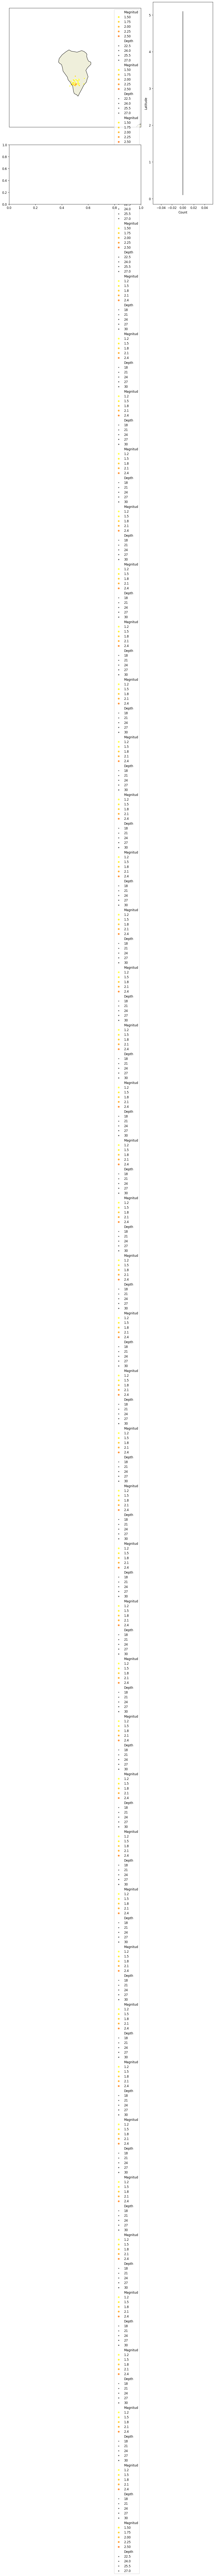

In [ ]:
"""
En esta sección, se intentó crear una animación que mostrara el progreso temporal
de los datos en las distintas gráficas, sin embargo, la librería seaborn y el tamaño
del conjunto de datos impedian que esta animación cargara correctamente. Se deja
el código a continuación de la animación y el último intento
no exitoso de crear la animación.
"""

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Preambumos
max_mag = cjd.Magnitud.max()
min_mag = cjd.Magnitud.min()

n = 12 # Editar si se ve necesario
delta_mag = (max_mag - min_mag) / n


# Set writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist = 'me'), bitrate=1800)

# Create plot
fig = plt.figure(figsize=(12, 12), dpi=120)
gs = fig.add_gridspec(3,3)
ax_map = fig.add_subplot(gs[:2, :2], projection=ccrs.PlateCarree())
ax_depth = fig.add_subplot(gs[2, :2])
ax_mag = fig.add_subplot(gs[:, 2])
ax_map.add_feature(cf.COASTLINE)
ax_map.add_feature(cf.LAND)
ax_map.set_extent([df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max()])


def get_data(Date):
    x = cjd.loc[cjd.Date == Date, 'Longitude'] # cjd.Date.isin(Date)
    y = cjd.loc[cjd.Date == Date, 'Latitude']
    hue = cjd.loc[cjd.Date == Date, 'Magnitud']
    s = cjd.loc[cjd.Date == Date, 'Depth']
    return x, y, hue, s

def init():
    x, y, hue, s = get_data(Date=cjd.loc[0, "Date"])
    scat = sns.scatterplot(x=x, y=y, hue=hue, data=cjd, palette='hot_r', alpha=0.8, transform=ccrs.PlateCarree(),
                size=s, hue_norm=norma_color, size_norm=norma_tamanno, sizes=(1, 50), ax=ax_map, legend="brief")

    hist = sns.histplot(y=y, data=cjd, stat='frequency', bins=n, binrange=[min_mag, max_mag], ax=ax_mag)

    return scat, hist

def animate(i):
    x, y, hue, s = get_data(Date=cjd.loc[i, "Date"])
    scat = sns.scatterplot(x=x, y=y, hue=hue, data=cjd, palette='hot_r', alpha=0.8, transform=ccrs.PlateCarree(),
                size=s, hue_norm=norma_color, size_norm=norma_tamanno, sizes=(1, 50), ax=ax_map, legend="brief")

    hist = sns.histplot(y=y, data=cjd, bins=n, binrange=[min_mag, max_mag], ax=ax_mag)

    return scat, hist

ani = FuncAnimation(fig=fig, func=animate, frames=len(cjd.iloc[0:200]), interval=0.1)
path = r'/content/drive/MyDrive/PR, Visualizacion de datos'
ani.save(os.path.join(path, "winners.mp4"), writer=writer)

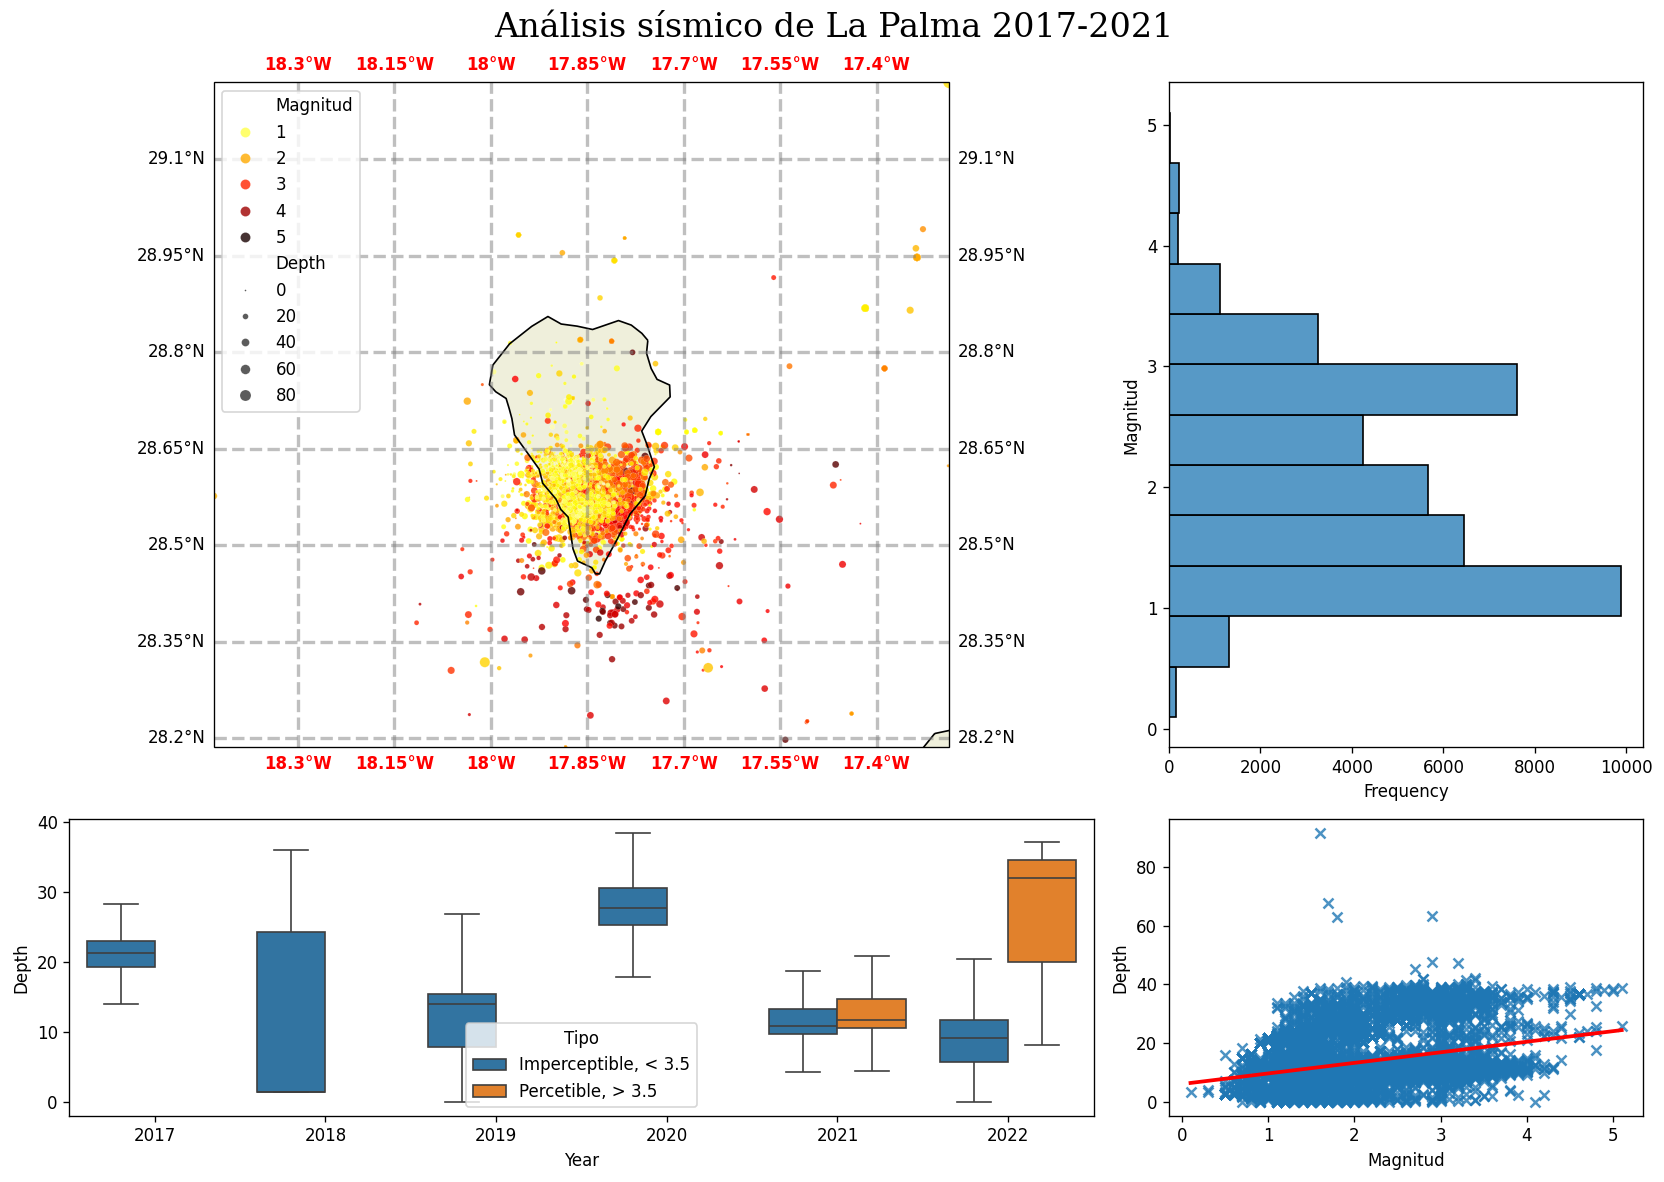

In [ ]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Preambumos
max_mag = cjd.Magnitud.max()
min_mag = cjd.Magnitud.min()

font = {'family': 'serif',
        'color':  'black',
        }

n = 12 # Editar si se ve necesario
delta_mag = (max_mag - min_mag) / n

fig = plt.figure(figsize=(14, 10), dpi=120)
fig.suptitle("Análisis sísmico de La Palma 2017-2021",
             fontdict=font,
             fontsize=20)
gs = fig.add_gridspec(3,3)
ax_map = fig.add_subplot(gs[:2, :2], projection=ccrs.PlateCarree())
ax_depth = fig.add_subplot(gs[2, :2])
ax_mag = fig.add_subplot(gs[:2, 2])
ax_scat = fig.add_subplot(gs[2, 2])

ax_map.add_feature(cf.COASTLINE)
ax_map.add_feature(cf.LAND)
ax_map.set_extent([df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max()])

gl = ax_map.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

sns.scatterplot(x='Longitude', y='Latitude', data=cjd, hue='Magnitud', palette='hot_r',
                alpha=0.8, transform=ccrs.PlateCarree(),
                size='Depth', hue_norm=norma_color, size_norm=norma_tamanno, sizes=(1, 50), ax=ax_map, legend="brief")

sns.histplot(y='Magnitud',
             data=cjd,
             bins=n,
             binrange=[min_mag, max_mag],
             ax=ax_mag,
             stat="frequency")

sns.boxplot(data=cjd,
            x='Year',
            y='Depth',
            hue='Tipo',
            showfliers=False,
            ax=ax_depth)

sns.regplot(data=cjd,
            x='Magnitud',
            y='Depth',
            ax=ax_scat,
            robust=True,
            marker='x',
            line_kws=dict(color="r"))

fig.tight_layout()
fig.savefig("PR_final.svg")